In [1]:
# Notebooks specific imports ########################################
from IPython import get_ipython
ipython = get_ipython()
#Expand notebook display
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2
from tqdm.notebook import tqdm
# End notebooks specific imports ####################################

# Basic useful imports
import yaml
from pathlib import Path
import h5py
import math

# Data manipulation
import numpy as np

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt

# From alens_analysis
import alens_analysis as aa
import alens_analysis.chromatin as aac

# Locations
alens_data_path = Path.home() / '/mnt/ceph/users/dvavylonis/aLENS_runs/'

from scipy.spatial import cKDTree

In [2]:
graph_sty = {
    "axes.titlesize": 18,
    "axes.labelsize": 18,
    "lines.linewidth": 2,
    "lines.markersize": 2,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "font.size": 18,
#    "font.sans-serif": 'Helvetica',
    "text.usetex": False,
    'mathtext.fontset': 'cm',
}
plt.style.use(graph_sty)

In [3]:
def zrho_corr(sy_dat,com_arr,time,distance):  # endpoints, centerpoints, time and cutoff distcnce
    positions = []
    # find pairs within distance at given time
    for filsegment in range (0, np.shape(com_arr)[0]-1):
        # because the number of segments grows over time, to use alens_analysis I added ghost segments at early times 
        # I stupidly chose the ghost segment positions to be zero, so I exclude those here
        initiald = com_arr[filsegment,:,time]
        if not ((initiald[0] == 0) and (initiald[1] == 0) and (initiald[2] == 0)):
            positions.append(com_arr[filsegment,:,time])
        tree = cKDTree(positions, boxsize=box_size)
        pairs = tree.query_ball_point(positions,r=distance,workers=-1,return_length=False)

    #built correlations
    n_arr = (sy_dat[:, 5:8, :]-sy_dat[:, 2:5, :])/(0.2-0.007)  #nhat with 0.2 = segment length, 0.007 is cylinder diameter
    current = -1
    zpos = []
    rhopos = []
    for n in pairs:
        current = current+1
        for k in n:
            if k!=current:   
                n = n_arr[current,:,time]
                r = com_arr[current,:,time]- com_arr[k,:,time]
                z = np.dot(n,r)  # z distance along nhat of reference segment
                ncrossr = np.cross(n,r)
                rho = np.sqrt(np.dot(ncrossr,ncrossr)) # radial distance from nhat of reference segment
                zpos.append(z)
                rhopos.append(rho)
    return zpos,rhopos

In [15]:
with h5py.File(next(sim_path.glob('alpha_r4.w/analysis/raw_alpha_r4.h5')), 'r+') as h5_data:
    # Load in time of every data point
    time_arr_4 = h5_data['time'][:] # [:] loads data as numpy array
    print(time_arr_4.size) # How many time points are there?
    # Load in sylinder data and get center of mass (COM) locations
    sy_dat_4 = h5_data['raw_data']['sylinders'][...]
    com_arr_4 = .5 * (sy_dat_4[:, 2:5, :] + sy_dat_4[:, 5:8, :]) #centerpoints
    
    # note some times points are repeated, I think during restarts. It should be a small effect. 

348


1832674


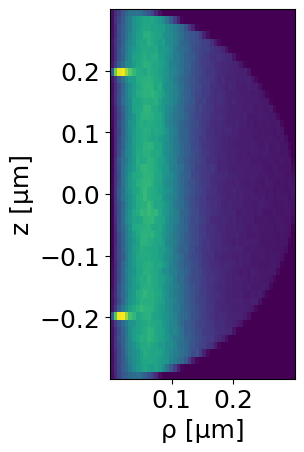

In [24]:
# Example of correlations close to origin
zpos, rhopos = zrho_corr(sy_dat_4,com_arr_4,340,0.3)
rhoarr = np.array(rhopos)
zarr = np.array(zpos)
print(len(rhoarr))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr, zarr, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

3690314


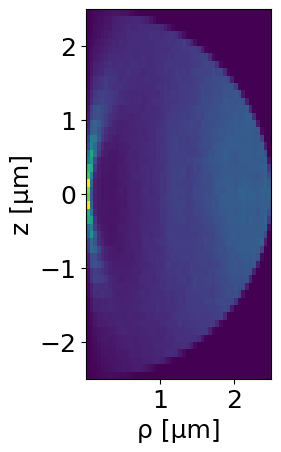

In [25]:
zpos20, rhopos20 = zrho_corr(sy_dat_4,com_arr_4,20,2.5)
rhoarr20 = np.array(rhopos20)
zarr20 = np.array(zpos20)
print(len(rhoarr20))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr20, zarr20, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

13443246


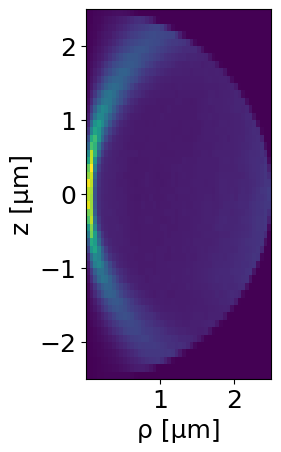

In [26]:
zpos50, rhopos50 = zrho_corr(sy_dat_4,com_arr_4,50,2.5)
rhoarr50 = np.array(rhopos50)
zarr50 = np.array(zpos50)
print(len(rhoarr50))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr50, zarr50, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

6846334


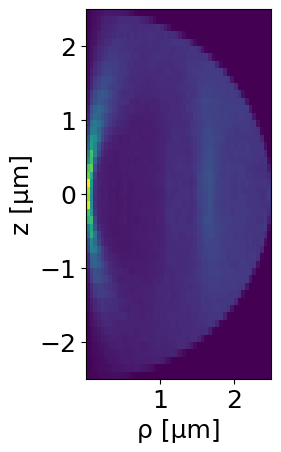

In [42]:
zpos30, rhopos30 = zrho_corr(sy_dat_4,com_arr_4,30,2.5)
rhoarr30 = np.array(rhopos30)
zarr30 = np.array(zpos30)
print(len(rhoarr30))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr30, zarr30, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

22554330


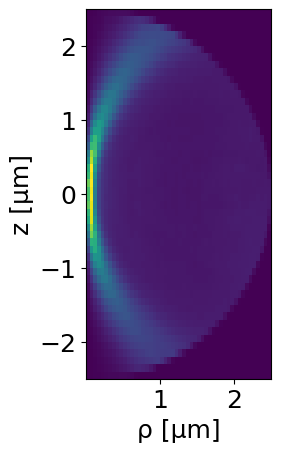

In [27]:
zpos100, rhopos100 = zrho_corr(sy_dat_4,com_arr_4,100,2.5)
rhoarr100 = np.array(rhopos100)
zarr100 = np.array(zpos100)
print(len(rhoarr100))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr100, zarr100, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

28924926


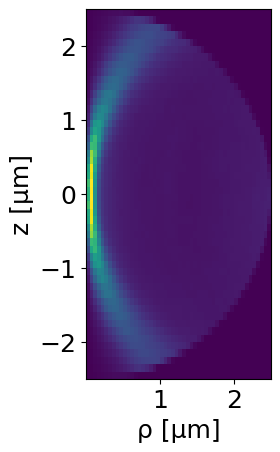

In [43]:
zpos300, rhopos300 = zrho_corr(sy_dat_4,com_arr_4,300,2.5)
rhoar300 = np.array(rhopos300)
zarr300 = np.array(zpos300)
print(len(rhoarr300))
heatmap, rhoedges, zedges = np.histogram2d(rhoarr300, zarr300, bins=50)
extent = [rhoedges[0], rhoedges[-1], zedges[0], zedges[-1]]

_ = plt.clf()
_ = plt.imshow(heatmap.T, extent=extent, origin='lower')
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("z [μm]")

In [28]:
perpcorr20 = []
for n in range (0,len(zarr20)):
    if (zarr20[n] < 0.2) and (zarr20[n] > -0.2) :
        perpcorr20.append(rhoarr20[n])             

In [39]:
perpcorr30 = []
for n in range (0,len(zarr30)):
    if (zarr30[n] < 0.2) and (zarr30[n] > -0.2) :
        perpcorr30.append(rhoarr30[n])    

In [29]:
perpcorr50 = []
for n in range (0,len(zarr50)):
    if (zarr50[n] < 0.2) and (zarr50[n] > -0.2) :
        perpcorr50.append(rhoarr50[n])   

In [ ]:
perpcorr100 = []
for n in range (0,len(zarr100)):
    if (zarr100[n] < 0.2) and (zarr100[n] > -0.2) :
        perpcorr100.append(rhoarr100[n])   

In [46]:
perpcorr300 = []
for n in range (0,len(zarr300)):
    if (zarr300[n] < 0.2) and (zarr300[n] > -0.2) :
        perpcorr300.append(rhoarr300[n])  

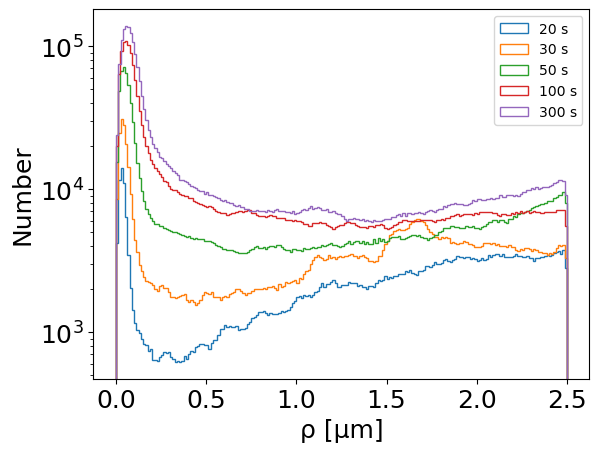

In [52]:
_ = plt.hist(perpcorr20,200,histtype=u'step',label="20 s")#,density=True)
_ = plt.hist(perpcorr30,200,histtype=u'step',label="30 s")#,density=True)
_ = plt.hist(perpcorr50,200,histtype=u'step',label="50 s")#,density=True)
_ = plt.hist(perpcorr100,200,histtype=u'step',label="100 s")#,density=True)
_ = plt.hist(perpcorr300,200,histtype=u'step',label="300 s")#,density=True)
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("Number")
_ = plt.yscale("log")
_ = plt.legend(loc='upper right',fontsize="10")

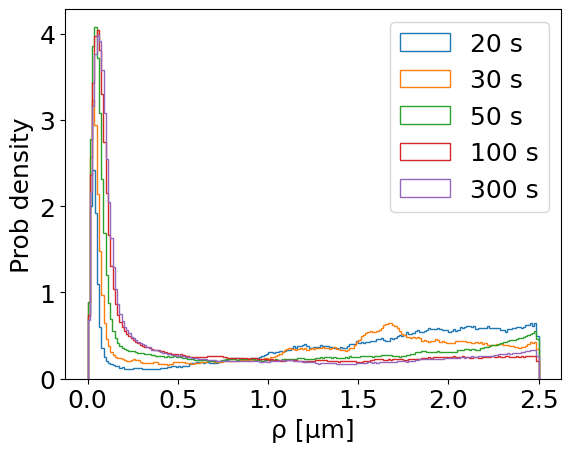

In [49]:
_ = plt.hist(perpcorr20,200,histtype=u'step',label="20 s",density=True)
_ = plt.hist(perpcorr30,200,histtype=u'step',label="30 s",density=True)
_ = plt.hist(perpcorr50,200,histtype=u'step',label="50 s",density=True)
_ = plt.hist(perpcorr100,200,histtype=u'step',label="100 s",density=True)
_ = plt.hist(perpcorr300,200,histtype=u'step',label="300 s",density=True)
_ = plt.xlabel("ρ [μm]")
_ = plt.ylabel("Prob density")
_ = plt.legend(loc='upper right')